# Movies

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
# Collect .athdf outputs
athinput = athena_read.athinput('athinput.si')
outputs = sorted(list(Path('athdf').glob(athinput["job"]["problem_id"] +
                                        '.out1.*.athdf')))

In [3]:
# Init sim constants and grid
c_s = athinput['hydro']['iso_sound_speed'] # sound speed
Omega = athinput['problem']['omega']       # local Keplerian angular frequency
H = c_s / Omega                            # gas scale height
T = 2*np.pi/Omega                          # orbital period
data = athena_read.athdf(outputs[0])
xf, zf = data['x1f'] / H, data['x2f'] / H

In [4]:
word = 'rhop'
if 'rho' not in word: print('not here')
else: print('here')

here


In [5]:
# Load data into memory
times = []
# rhos = []
rhops = []

for output in outputs:
    data = athena_read.athdf(output)
    times.append(data['Time'] / T)
#     rhos.append(data['rho'][0])      # [0] effectively flattens 3D array
    rhops.append(data['rhop'][0])

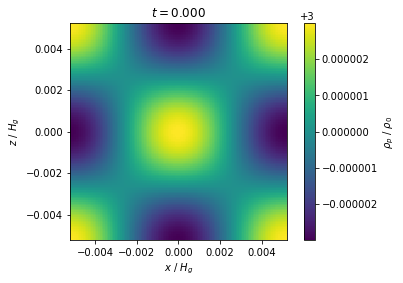

In [6]:
# Initialize frame
fig, ax = plt.subplots() # try dpi=150
ax.set_aspect('equal')
ax.set_title('$t={:.3f}$'.format(times[0]))
ax.set_xlabel('$x$ / $H_g$')
ax.set_ylabel('$z$ / $H_g$')
img = ax.pcolormesh(xf, zf, rhops[0])
cb = plt.colorbar(img)
cb.set_label(r'$\rho_p$ / $\rho_0$')

In [7]:
# Update frames with output sequence
def animate(i):
    ax.set_title('$t={:.3f}$'.format(times[i]))
    img.set_array(rhops[i].ravel()) # flatten 2D array to 1D array
    img.set_clim(rhops[i].min(), rhops[i].max())

In [8]:
# Compile and embed animation
fps = 30      # frames per second (Hz)
delay = 1/fps # delay between frames in ms
anim = animation.FuncAnimation(fig, animate, frames=len(times), interval=delay)
HTML(anim.to_html5_video())